# <center>Car Price Prediction </center>

# Outlines 
> Project target : Predict Used car price based on car specifications 
1. Data cleaning 
2. feature engineering 
3. Getting more insights 
4. Data Pre-processing
5. modeling 
6. evalution 

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
# Packages for EDA 
import pandas as pd 
import numpy as np 
import seaborn as sns 

# Data Preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
np.seterr(divide='ignore', invalid='ignore', over='ignore')


# Showing Plots inside notebook
%matplotlib inline  
sns.set(rc={'figure.figsize': [7, 14]}, font_scale=1.2) # Standard figure size for all 

In [72]:
df = pd.read_csv("/content/drive/MyDrive/colab/train-data.csv")
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3899,3899,Audi A4 2.0 TDI,Bangalore,2013,76000,Diesel,Automatic,Second,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,18.25
2904,2904,Mercedes-Benz E-Class 280 CDI,Chennai,2007,75000,Diesel,Automatic,First,11.0 kmpl,2987 CC,198.5 bhp,5.0,NaN,11.00
1745,1745,Maruti Alto LXi BSIII,Jaipur,2010,73513,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,NaN,1.85
5342,5342,Honda Amaze VX i-VTEC,Coimbatore,2019,16573,Petrol,Manual,First,17.8 kmpl,1198 CC,86.7 bhp,5.0,NaN,9.31
5811,5811,Skoda Superb 1.8 TSI,Pune,2010,35102,Petrol,Automatic,First,12.6 kmpl,1798 CC,161.6 bhp,5.0,NaN,5.50


# 1. Data cleaning 


### 1.1 Investegation 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [74]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [75]:
df.duplicated().sum()

0

#### Notes 
- Numerical values mixed with text in (Mileage, Engine, Power) columns. 
    - in Milage column we have 2 units (kmpl & km/kg)
- Most of New_Price Column is null values (so, we have 2 solution.) 
    - remove it or scrap some data to fill it. 
- Null values values in other columns 
- Seats columns have some values with Zero !! 
- duplicated rows founded 
- Power column have values "null bhp" 

###  1.2 Working with data issues 

> Dropping duplicated columns 

In [76]:
# Remove duplicated row 
df.drop_duplicates(inplace=True)

> Drop "New_Price" column because most of them is null 
- Another solution is to Scrap New price 

In [77]:
df.drop("New_Price", axis=1, inplace=True)

> Imputing Null values 

In [78]:
# My solution 
from sklearn.impute import SimpleImputer

null_col = ['Mileage', 'Engine' , 'Power','Seats']

imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

> Make sure that all data type is correct 

In [79]:
df = df.convert_dtypes()

> Impute zeros in seats column 

In [80]:
df['Seats'].replace(to_replace=0 ,value= df['Seats'].mode()[0],inplace=True)

In [81]:
df[df['Power'] == 'null bhp']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5,2.0
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5,1.3
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5,2.1
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,1.2
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,5,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6,1.7


In [82]:
indx = df[df['Power'] == 'null bhp'].index

In [83]:
df.drop(indx,axis=0,inplace=True)

- (KMPL) is refered to Kilometers Per Litre
- (km/kg) is refered to kilometers Per kilogram
> 1 liter  = 1 kilogram 
- Reference : https://en.wikipedia.org/wiki/Litre

In [84]:
dirty_cols = ['Mileage', 'Engine', 'Power']

In [85]:
for col in dirty_cols:
    df[col] = df[col].apply(lambda x : float(x.split()[0]))

#### values health checking 

In [86]:
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5556,5556,Hyundai Grand i10 Sportz,Kolkata,2013,28000,Petrol,Manual,First,18.90,1197.0,82.0,5,3.25
1503,1503,Maruti Baleno Alpha 1.3,Hyderabad,2016,30112,Diesel,Manual,First,27.39,1248.0,74.0,5,7.79
5576,5576,Hyundai Verna 1.6 SX VTVT,Mumbai,2014,9200,Petrol,Manual,First,17.01,1591.0,121.3,5,5.75
2859,2859,Renault KWID Climber 1.0 MT,Hyderabad,2018,4126,Petrol,Manual,First,21.70,999.0,67.0,5,4.8
5479,5479,Renault KWID Climber 1.0 AMT,Chennai,2018,14000,Petrol,Automatic,First,22.50,999.0,67.0,5,4.5


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5912 non-null   Int64  
 1   Name               5912 non-null   string 
 2   Location           5912 non-null   string 
 3   Year               5912 non-null   Int64  
 4   Kilometers_Driven  5912 non-null   Int64  
 5   Fuel_Type          5912 non-null   string 
 6   Transmission       5912 non-null   string 
 7   Owner_Type         5912 non-null   string 
 8   Mileage            5912 non-null   float64
 9   Engine             5912 non-null   float64
 10  Power              5912 non-null   float64
 11  Seats              5912 non-null   Int64  
 12  Price              5912 non-null   Float64
dtypes: Float64(1), Int64(4), float64(3), string(5)
memory usage: 675.5 KB


___________________________________

# 2. Feature Engineering

In [88]:
# Check Name column uniques 
df["Name"].nunique()

1830

In [89]:
print("Percentage of uniques",round(df["Name"].nunique()/df.shape[0]*100),"%")

Percentage of uniques 31 %


>  "Name" feature has no affect that's because it has so many unique values 
- So let's make it useful and impactful 

In [90]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5912, dtype: string

> We can notice that the first word of the name is (Brand), so let's get it 

In [91]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [92]:
df["Brand"].nunique()

30

- A huge difference here, From this columns we can make a big affect. 

> Another observation that first two word can express wich car we want. 
- So, let's change name column with just first 2 words. 

In [93]:
df["Name"] = df["Name"].apply(lambda x : " ".join(x.split()[:2]))

In [94]:
df["Name"].nunique()

209

- That's great, Now we can make an affect with name column. 

In [95]:
df = df.convert_dtypes()

________________________

In [96]:
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
2067,2067,Maruti Swift,Pune,2008,56230,Petrol,Manual,Second,17.5,1298,85.8,5,2.4,Maruti
3391,3391,Hyundai i10,Pune,2013,45000,Petrol,Manual,First,20.36,1197,78.9,5,3.55,Hyundai
2407,2407,Honda City,Chennai,2013,83432,Petrol,Manual,First,17.0,1497,118.0,5,5.9,Honda
5015,5015,Maruti Swift,Delhi,2006,63000,Petrol,Manual,First,16.1,1197,74.0,5,1.6,Maruti
1520,1520,Nissan Sunny,Pune,2014,95000,Diesel,Manual,First,21.64,1461,84.8,5,4.5,Nissan


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5912 non-null   Int64  
 1   Name               5912 non-null   string 
 2   Location           5912 non-null   string 
 3   Year               5912 non-null   Int64  
 4   Kilometers_Driven  5912 non-null   Int64  
 5   Fuel_Type          5912 non-null   string 
 6   Transmission       5912 non-null   string 
 7   Owner_Type         5912 non-null   string 
 8   Mileage            5912 non-null   Float64
 9   Engine             5912 non-null   Int64  
 10  Power              5912 non-null   Float64
 11  Seats              5912 non-null   Int64  
 12  Price              5912 non-null   Float64
 13  Brand              5912 non-null   string 
dtypes: Float64(3), Int64(5), string(6)
memory usage: 739.0 KB


In [98]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,3012.791272,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,1735.810485,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,1510.750000,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,3013.500000,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,4515.250000,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


________________________

In [99]:
df.to_csv("Cleaned_Data.csv")

# 3. Data understanding 

### 3.1 Univariate analysis 

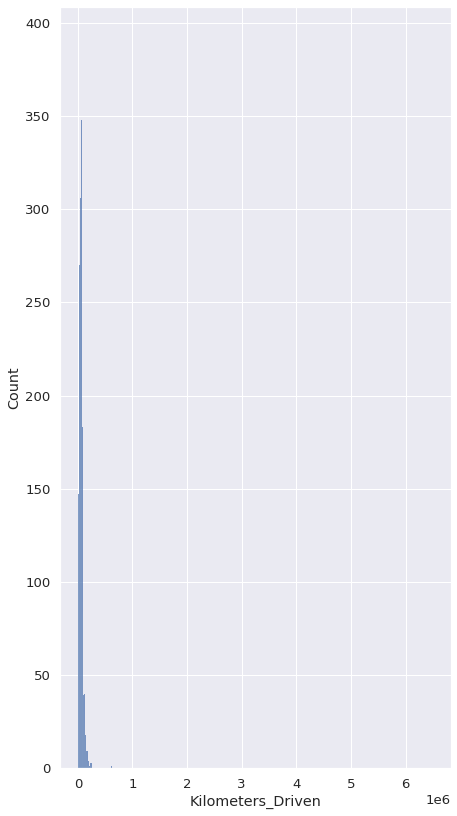

In [100]:
sns.histplot(data = df , x = 'Kilometers_Driven');

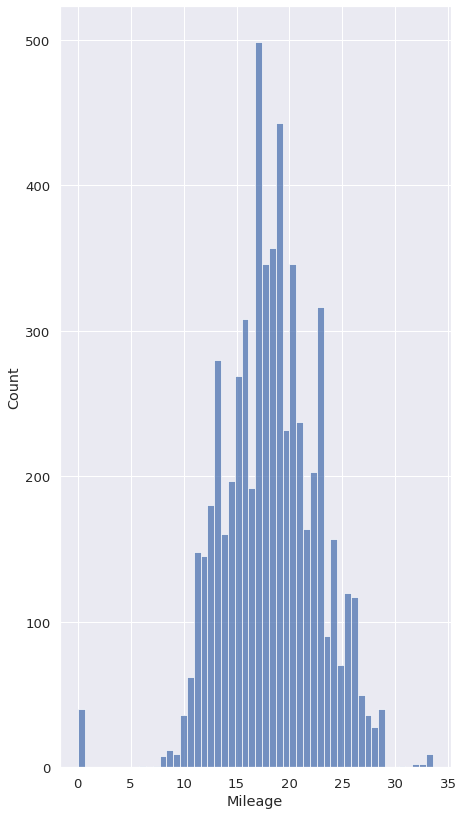

In [101]:
sns.histplot(data = df , x = 'Mileage');

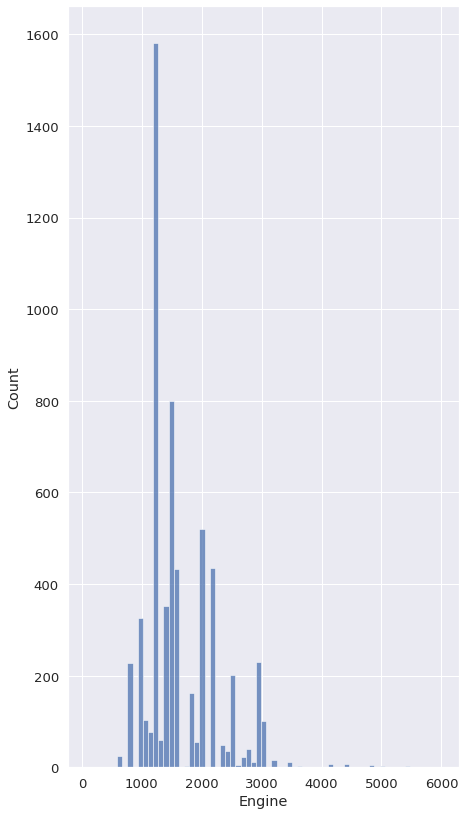

In [102]:
sns.histplot(data = df , x = 'Engine');

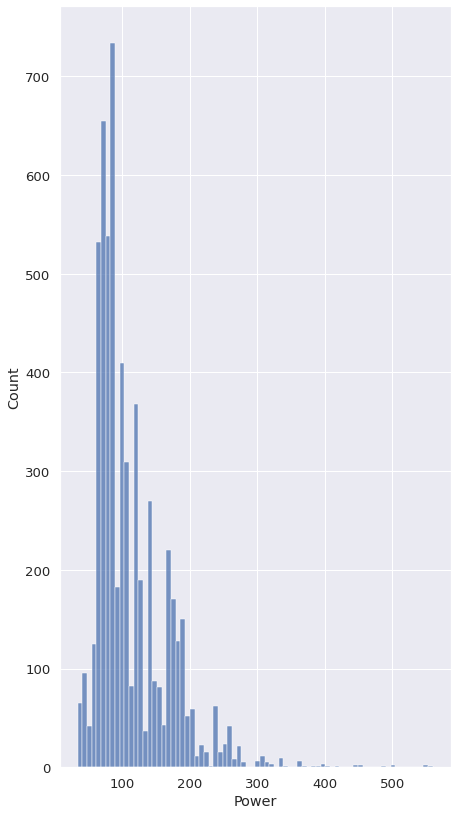

In [103]:
sns.histplot(data = df , x = 'Power');

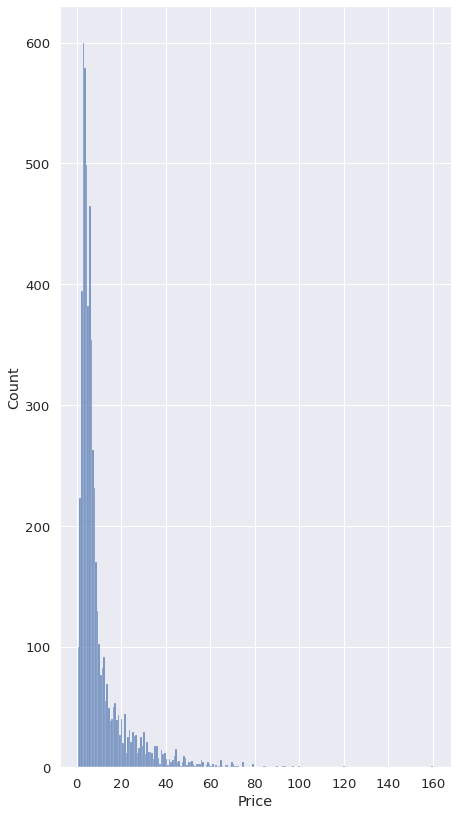

In [104]:
sns.histplot(data = df , x = 'Price');

In [105]:
numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']

In [106]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
df_nums = df.copy()
from datasist.structdata import detect_outliers 

outliears = detect_outliers(df_nums[numerical_cols],0,df_nums[numerical_cols].columns)
df_nums.drop(outliears,inplace=True)

# outliears = detect_outliers(df[['Price']],0,df[['Price']].columns)
# df[['Price']].drop(outliears,inplace=True)

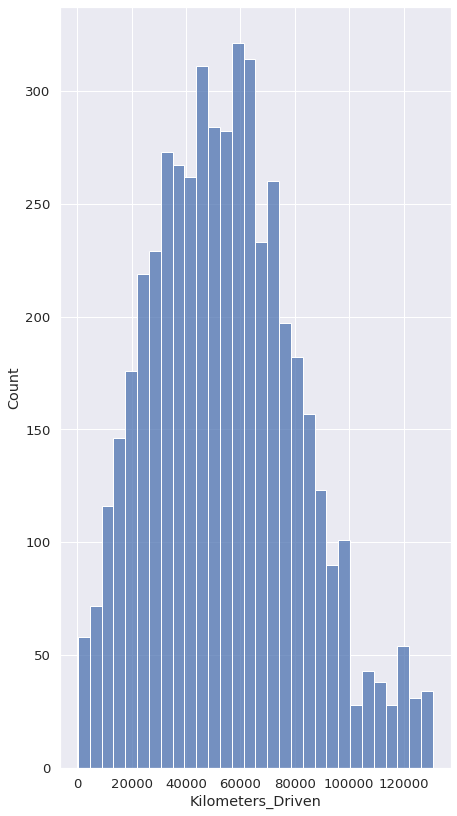

In [108]:
sns.histplot(data = df_nums , x = 'Kilometers_Driven');

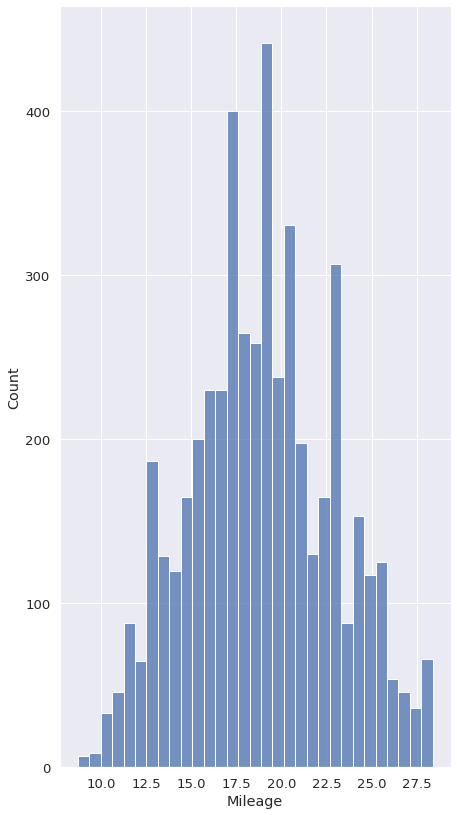

In [109]:
sns.histplot(data = df_nums , x = 'Mileage');

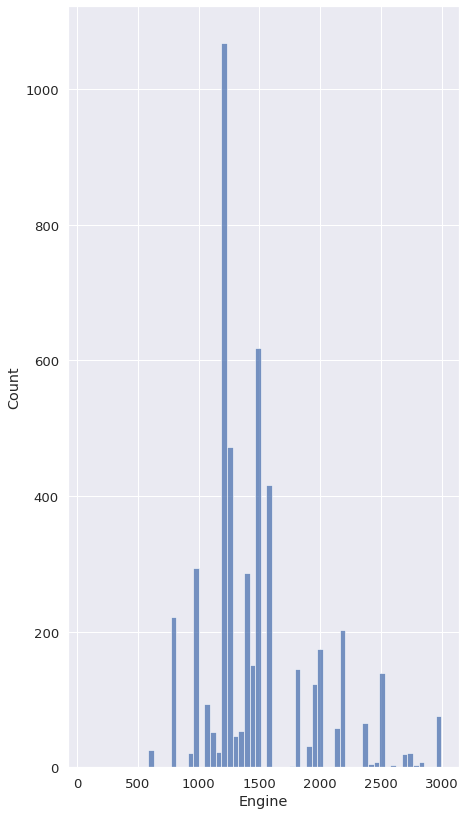

In [110]:
sns.histplot(data = df_nums , x = 'Engine');

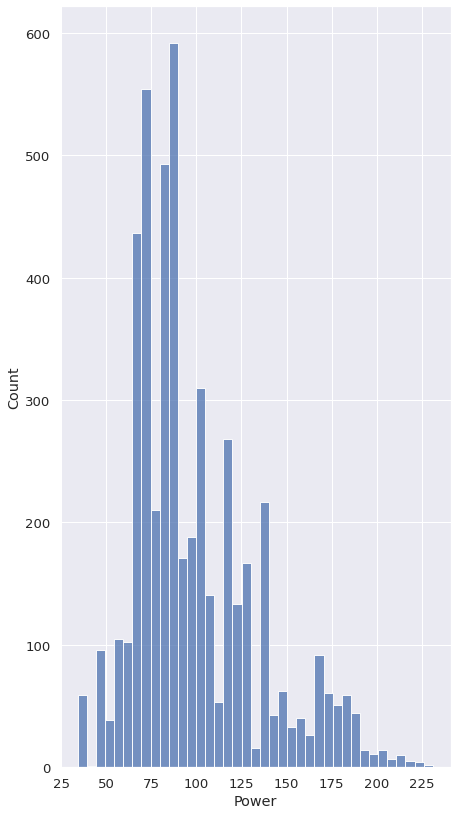

In [111]:
sns.histplot(data = df_nums , x = 'Power');

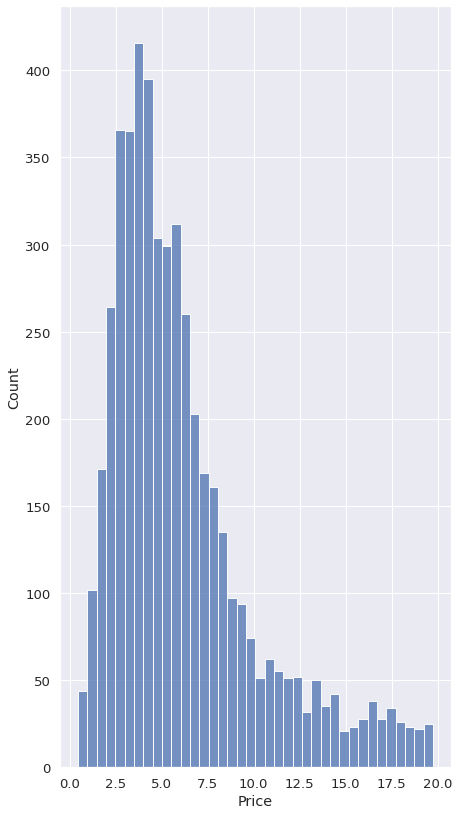

In [112]:
sns.histplot(data = df_nums , x = 'Price');

## Data summery : 
    - Numerical columns follow the gussian distribution, but have Outliers 
    (My desicion is not to remove it,because it will ne useful)
    - The countrt with the most sales spread is `Mumbai` and the least is `Ahmedabad`
    - Most of cars is form 2010 and 2015

In [113]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75,Maruti
1,1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.5,Hyundai
2,2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.5,Honda
3,3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.0,Maruti
4,4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74.0,5,4.75,Maruti
6015,6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71.0,5,4.0,Hyundai
6016,6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112.0,8,2.9,Mahindra
6017,6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5,2.65,Maruti


________________________

# 4. Data pre-processing

### 4.1 Data transformation 

#### 4.1.1 Catogerical transformation

##### 4.1.1.1 ordinal transformation

In [114]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [115]:
df['Owner_Type'] = df['Owner_Type'].map(transformation)

> The best case of owner type is (First), Of course the worst is Fourth & Above

##### 4.1.1.2 Nominal transformation


In [116]:
Nominal_data = ['Name','Location','Fuel_Type','Transmission','Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
df = binaryencoder.fit_transform(df)

In [117]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']

#### 4.2.1 Numerical transformation 

In [118]:
# power = PowerTransformer()
new_df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns, index=df.index)

### 4.1 Data splitting 

In [119]:
# define dataset
X, y = new_df.drop("Price",axis=1) , new_df["Price"] 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5.0 Modeling 

### 5.1 Linear regression (OLS method)

In [120]:
reg = LinearRegression().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 87.81 %
R-Squered Test 88.4 %
RMSE: 0.11028248874777868


### 5.3 Linear regression (Lasso method)

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X_train)

PolynomialFeatures()

In [122]:
X_train = poly_reg.transform(X_train)
X_test = poly_reg.transform(X_test)

In [123]:
reg = LassoCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 94.96 %
R-Squered Test 94.43 %
RMSE: 0.05299341980334996


### 5.4 Linear regression (Ridge method)

In [124]:
reg = RidgeCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 95.31 %
R-Squered Test 94.16 %
RMSE: 0.05551218083438009


### 5.4 Linear regression (ElasticNetCV method)

In [125]:
reg = ElasticNetCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 94.98 %
R-Squered Test 94.43 %
RMSE: 0.05295312143740461


> The best reqularization method That fit data well __ElasticNet__